## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics, tree

In [3]:
df = pd.read_csv('dataset_diabetes\diabetic_data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

See the different features.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

See the value distribution for each feature.

In [4]:
for i in df.columns:
    print(df[i].value_counts())

96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
2674482      1
281345844    1
193616274    1
355508024    1
165973818    1
125278944    1
420873188    1
157241154    1
161161032    1
174855390    1
134950734    1
154128210    1
96993108     1
122064144    1
297770840    1
382612616    1
165134172    1
108244830    1
210578766    1
443842340    1
151469730    1
289146210    1
154590960    1
145948404    1
176328594    1
273063672    1
44732154     1
48152316     1
225980556    1
122507010    1
169616742    1
356089604    1
164982534    1
53022474     1
160348158    1
152907534    1
198246882    1
66969360     1
73381140     1
411488960    1
374860526    1
121872330    1
255176478    1
94793574     1
413776052    1
157870386    1
220258224    1
146758746    1
239660982    1
181444536    1
153653178    1
129548220    1
250392510    1
207031026    1
61046724     1
162996168    1
223559628    1
276770766    1
179258916    1
59506644     1
62386134     1
210559950 

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
23643405     22
84428613     22
92709351     21
23398488     20
90609804     20
88789707     20
37096866     20
89472402     20
29903877     20
88681950     19
88479036     19
97391007     19
24011577     18
3481272      18
91160280     18
84348792     18
3401055      18
91751121     18
106757478    17
90489195     17
41699412     17
84676248     16
384939       16
90164655     16
41617368     16
84397842     15
41717169     15
16156494     15
362610       15
86931513     15
34248474     15
85232619     15
2486844      15
110463471    15
88410879     14
103832127    14
91776843     14
40595031     14
62352252     14
80811567     13
40373325     13
88844373     13
5207247      13
42915474     13
109448541    13
106526691    13
97019901     13
90052641     13
103140       13
41744394     13
25151994     13
45305631     13
88533495     13
42567840     12
93205692     12
41095215     12
41041530     12
41220999

Name: acetohexamide, dtype: int64
No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64
No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64
No        101743
Steady        23
Name: tolbutamide, dtype: int64
No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64
No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64
No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64
No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64
No        101763
Steady         3
Name: troglitazone, dtype: int64
No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64
No    101766
Name: examide, dtype: int64
No    101766
Name: citoglipton, dtype: int64
No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: in

Replace the ? by NaN.

In [5]:
df.replace('?',np.nan,inplace=True)
# df=df[ ~ df['payer_code'].isin(['?'])]
# df.info()

Drop the features that have too many NaN values or distribute not equally.(One value of the feature takes up the distribution too much.)

In [6]:
df.drop(columns = df.columns[22:41],inplace = True)
df.drop(columns = df.columns[23:28],inplace = True)
df.drop(columns=['weight','payer_code','medical_specialty','number_outpatient','number_emergency'],inplace = True)

#[22:41]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  diag_1                    101745 non-null  object
 14  diag

In [8]:
df.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_inpatient  \
count       101766.000000   101766.000000    101766.000000     101766.000000   
mean            43.095641        1.339730        16.021844          0.635566   
std             19.674362        1.705807         8.127566          1.262863   
min              1.000000        0.000000         1.000000          0.000000   
25%             31.000000        0.000000        10.000000          0.000000   
50%             44.000000        1.000000        15.000000          0.000000   
75%             57.000000        2.000000        20.000000          1.000000   
max            132.000000        6.000000        81.000000         21.000000   

       number_diagnoses  
count     101766.000000  
mean           7.422607  
std            1.933600  
min            1.000000  
25%            6.000000  
50%            8.000000  
75%            9.000000  
max           16.000000

In [9]:
df.describe(include=['O'])

race  gender      age  diag_1  diag_2  diag_3 insulin  change  \
count       99493  101766   101766  101745  101408  100343  101766  101766   
unique          5       3       10     716     748     789       4       2   
top     Caucasian  Female  [70-80)     428     276     250      No      No   
freq        76099   54708    26068    6862    6752   11555   47383   54755   

       diabetesMed readmitted  
count       101766     101766  
unique           2          3  
top            Yes         NO  
freq         78363      54864

Actually diagnose 1 is really important, so I decided to delete the value that is NaN for diagnose 1. In later steps, I will also drop diagnose 2 and diagnose 3 directly since just using diagnose 1 is enough for prediction medically.

In [10]:
df = df.dropna(subset=["diag_1"])

In [11]:
# df["diag_1"].value_counts()

428       6862
414       6581
786       4016
410       3614
486       3508
427       2766
491       2275
715       2151
682       2042
434       2028
780       2019
996       1967
276       1889
38        1688
250.8     1680
599       1595
584       1520
V57       1207
250.6     1183
518       1115
820       1082
577       1057
493       1056
435       1016
562        989
574        965
296        896
560        876
250.7      871
250.13     851
440        840
433        789
998        784
722        771
250.02     675
578        663
250.11     625
507        610
789        561
453        546
530        531
8          515
403        513
535        450
415        449
402        449
295        447
724        440
458        426
162        425
997        424
250.12     417
250.82     412
278        379
733        367
285        365
592        350
401        346
482        339
558        335
590        335
197        320
280        319
824        316
250.1      313
153        311
426       

In [12]:
# for i in df["diag_1"]:
#     if 'V' in i or 'E' in i or i =='?':
#         newvalue = 0
#         df.loc[(df.diag_1 == i),'diag_1'] = 0

df["diag_1"] = pd.to_numeric(df["diag_1"],errors='coerce')
df["diag_1"].value_counts()

428.00    6862
414.00    6581
786.00    4016
410.00    3614
486.00    3508
427.00    2766
491.00    2275
715.00    2151
682.00    2042
434.00    2028
780.00    2019
996.00    1967
276.00    1889
38.00     1688
250.80    1680
599.00    1595
584.00    1520
250.60    1183
518.00    1115
820.00    1082
577.00    1057
493.00    1056
435.00    1016
562.00     989
574.00     965
296.00     896
560.00     876
250.70     871
250.13     851
440.00     840
433.00     789
998.00     784
722.00     771
250.02     675
578.00     663
250.11     625
507.00     610
789.00     561
453.00     546
530.00     531
8.00       515
403.00     513
535.00     450
415.00     449
402.00     449
295.00     447
724.00     440
458.00     426
162.00     425
997.00     424
250.12     417
250.82     412
278.00     379
733.00     367
285.00     365
592.00     350
401.00     346
482.00     339
558.00     335
590.00     335
197.00     320
280.00     319
824.00     316
250.10     313
153.00     311
426.00     288
569.00    

According to https://www.hindawi.com/journals/bmri/2014/781670/tab2/, I decided to transfer the value of diagnose to specific disease based on the data shown in the website, which can be more easily to use this feature later based on different disease class. 

In [13]:
for i in df["diag_1"].unique():
#     print(i)
    try:
        value = float(i)
        if 390 <= value <= 459 or value == 785:
            newvalue = 'Circulatory'
        elif 460 <= value <= 519 or value == 786:
            newvalue = 'Respiratory'
        elif 520 <= value <= 579 or value == 787:
            newvalue = 'Digestive'
        elif 250 <= value < 251:
            newvalue = 'Diabetes'
        elif 800 <= value <= 999:
            newvalue = 'Injury'
        elif 710 <= value <= 739:
            newvalue = 'Musculoskeletal'
        elif 580 <= value <= 629 or value == 788:
            newvalue = 'Genitourinary'
        elif 140 <= value <= 239:
            newvalue = 'Neoplasms'
        else:
            newvalue = 'Other'
    except:
        newvalue = 'Other'
    df.loc[(df.diag_1 == i),'diag_1'] = newvalue

250.83
276.0
648.0
8.0
197.0
414.0
428.0
398.0
434.0
250.7
157.0
518.0
999.0
410.0
682.0
402.0
737.0
572.0
nan
189.0
786.0
427.0
996.0
277.0
584.0
462.0
473.0
411.0
174.0
486.0
998.0
511.0
432.0
626.0
295.0
196.0
250.6
618.0
182.0
845.0
423.0
808.0
250.4
722.0
403.0
250.11
784.0
707.0
440.0
151.0
715.0
997.0
198.0
564.0
812.0
38.0
590.0
556.0
578.0
250.32
433.0
569.0
185.0
536.0
255.0
250.13
599.0
558.0
574.0
491.0
560.0
244.0
250.03
577.0
730.0
188.0
824.0
250.8
332.0
562.0
291.0
296.0
510.0
401.0
263.0
438.0
70.0
250.02
493.0
642.0
625.0
571.0
738.0
593.0
250.42
807.0
456.0
446.0
575.0
250.41
820.0
515.0
780.0
250.22
995.0
235.0
250.82
721.0
787.0
162.0
724.0
282.0
514.0
281.0
250.33
530.0
466.0
435.0
250.12
789.0
566.0
822.0
191.0
557.0
733.0
455.0
711.0
482.0
202.0
280.0
553.0
225.0
154.0
441.0
250.81
349.0
962.0
592.0
507.0
386.0
156.0
200.0
728.0
348.0
459.0
426.0
388.0
607.0
337.0
82.0
531.0
596.0
288.0
656.0
573.0
492.0
220.0
516.0
210.0
922.0
286.0
885.0
958.0
661.0
969.0
250.

In [15]:
df.describe(include=['O'])

race  gender      age       diag_1  diag_2  diag_3 insulin  \
count       99474  101745   101745       100100  101388  100323  101745   
unique          5       3       10            9     748     789       4   
top     Caucasian  Female  [70-80)  Circulatory     276     250      No   
freq        76092   54703    26064        30437    6749   11554   47371   

        change diabetesMed readmitted  
count   101745      101745     101745  
unique       2           2          3  
top         No         Yes         NO  
freq     54742       78348      54852

The patient number means the id of patient came to the hospital. In this problem, I decided to drop the duplicate value in this feature to ignore the influence caused by the same patient came to hospital multiple times.

In [16]:
df.drop_duplicates(subset=['patient_nbr'],keep='first',inplace=True)

The number 13 and 14 in the discharge disposition mean the patient died, which means the patient will definitely not come back to hospital again, so drop these data.

In [17]:
df = df[~df['discharge_disposition_id'].isin([13,14])]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71049 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71049 non-null  int64 
 1   patient_nbr               71049 non-null  int64 
 2   race                      69105 non-null  object
 3   gender                    71049 non-null  object
 4   age                       71049 non-null  object
 5   admission_type_id         71049 non-null  int64 
 6   discharge_disposition_id  71049 non-null  int64 
 7   admission_source_id       71049 non-null  int64 
 8   time_in_hospital          71049 non-null  int64 
 9   num_lab_procedures        71049 non-null  int64 
 10  num_procedures            71049 non-null  int64 
 11  num_medications           71049 non-null  int64 
 12  number_inpatient          71049 non-null  int64 
 13  diag_1                    70125 non-null  object
 14  diag_2               

Drop the id data.

In [19]:
data = df.drop(columns=df.columns[0:2])

Map these two features to number to be used later.

In [20]:
num_encode = {
    'diabetesMed': {'No': 0, 'Yes': 1},
    'insulin':{'No': 0, 'Up': 1, 'Steady': 2, 'Down':3}
    
}
data.replace(num_encode, inplace=True)
guess_discharge = np.zeros((2,4))  

In [21]:
data['diabetesMed'].value_counts()

1    53998
0    17051
Name: diabetesMed, dtype: int64

In [22]:
data['insulin'].value_counts()

0    34716
2    21965
3     7454
1     6914
Name: insulin, dtype: int64

Remove the missing value in race by using others value.

In [23]:
data['race'].fillna('Others',inplace = True)

### Imputation based on interacting features.

The medical used and insulin will affect the destination of patients. So for the missing value in discharge_disposition, based on diabetesMed and insulin to predict the value.

In [24]:
pd.set_option('mode.chained_assignment',None)

discharge_guess = 26

for i in range(0, 2):
    for j in range(0, 4):
        guess_df = data[(data['diabetesMed'] == i) & \
                              (data['insulin'] == j)]['discharge_disposition_id'].dropna()
        discharge_guess = guess_df.median()
        print(discharge_guess)
        if np.isnan(discharge_guess):
            discharge_guess = 26
        guess_discharge[i,j] = int(discharge_guess)

for i in range(0, 2):
    for j in range(0, 4):
        mask = data[((data.discharge_disposition_id==26) ^ (data.discharge_disposition_id==18) ^ (data.discharge_disposition_id==25)) & (data.diabetesMed == i) & (data.insulin == j)]     
        if mask.empty:
            continue

        data.loc[mask.index , 'discharge_disposition_id'] = int(guess_discharge[i, j])   

1.0
nan
nan
nan
1.0
1.0
1.0
1.0


But honestly speaking, it cannot remove all the missing or exceptional value.

In [ ]:
data['discharge_disposition_id'].value_counts()

Using the similar metric to predict the missing value in admission source, diagnose 1 and time_in_hospital might be decided by the different type of admission so that using these two to determine admission.

In [78]:
num_encode1 = {
    'diag_1': {'Circulatory': 0, 'Respiratory': 1, 'Digestive': 2, 'Diabetes': 3, 'Injury': 4, 'Musculoskeletal': 5, 'Genitourinary': 6, 'Neoplasms': 7, 'Other': 8},
    'admission_source_id': {9:21,17:21,20:21}
    
}
data.replace(num_encode1, inplace=True)
guess_discharge = np.zeros((9,14))  

In [27]:
pd.set_option('mode.chained_assignment',None)

discharge_guess = 0

for i in range(0, 9):
    for j in range(0, 14):
        guess_df = data[(data['diag_1'] == i) & \
                              (data['time_in_hospital'] == j+1)]['admission_source_id'].dropna()
        
        if guess_df.mode().size == 0:
            admission_guess = 21
        else:
            admission_guess = guess_df.mode()[0]
#         admission_guess = guess_df.median()
#         if np.isnan(admission_guess):
#             admission_guess = 
        guess_discharge[i,j] = int(admission_guess)

for i in range(0, 9):
    for j in range(0, 14):
        mask = data[(data.admission_source_id == 21) & (data.diag_1 == i) & (data.admission_source_id == j+1)]     
        if mask.empty:
            continue

        data.loc[mask.index , 'admission_source_id'] = int(guess_discharge[i, j])

Actually it still cannot remove all the missing or exceptional value.

In [28]:
data['admission_source_id'].value_counts()

7     37986
1     21898
21     5161
4      2572
6      1798
2       925
5       542
3       138
8        12
10        7
22        4
25        2
14        2
13        1
11        1
Name: admission_source_id, dtype: int64

Transfer the insulin into four values, to transfer into dummies. Later on, I will transfer all the categorical features into dummies because KNN algorithm prefers dummies more.

In [29]:
data["insulin"].unique()

array([0, 1, 2, 3], dtype=int64)

In [30]:
data["insulin"] = data["insulin"].replace(0,'InsulinNo')
data["insulin"] = data["insulin"].replace(1,'InsulinUp')
data["insulin"] = data["insulin"].replace(2,'InsulinSteady')
data["insulin"] = data["insulin"].replace(3,'InsulinDown')

In [31]:
# data["insulin"].unique()

In [32]:
dummy = pd.get_dummies(data['insulin'])
data = pd.concat([data, dummy], axis=1)      
data.drop(['insulin'], inplace=True, axis=1)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71049 entries, 0 to 101765
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71049 non-null  object
 1   gender                    71049 non-null  object
 2   age                       71049 non-null  object
 3   admission_type_id         71049 non-null  int64 
 4   discharge_disposition_id  71049 non-null  int64 
 5   admission_source_id       71049 non-null  int64 
 6   time_in_hospital          71049 non-null  int64 
 7   num_lab_procedures        71049 non-null  int64 
 8   num_procedures            71049 non-null  int64 
 9   num_medications           71049 non-null  int64 
 10  number_inpatient          71049 non-null  int64 
 11  diag_1                    70125 non-null  object
 12  diag_2                    70756 non-null  object
 13  diag_3                    69825 non-null  object
 14  number_diagnoses     

Print the correlation matrix of each feature, there are no features too correlated with each other.

<AxesSubplot:>

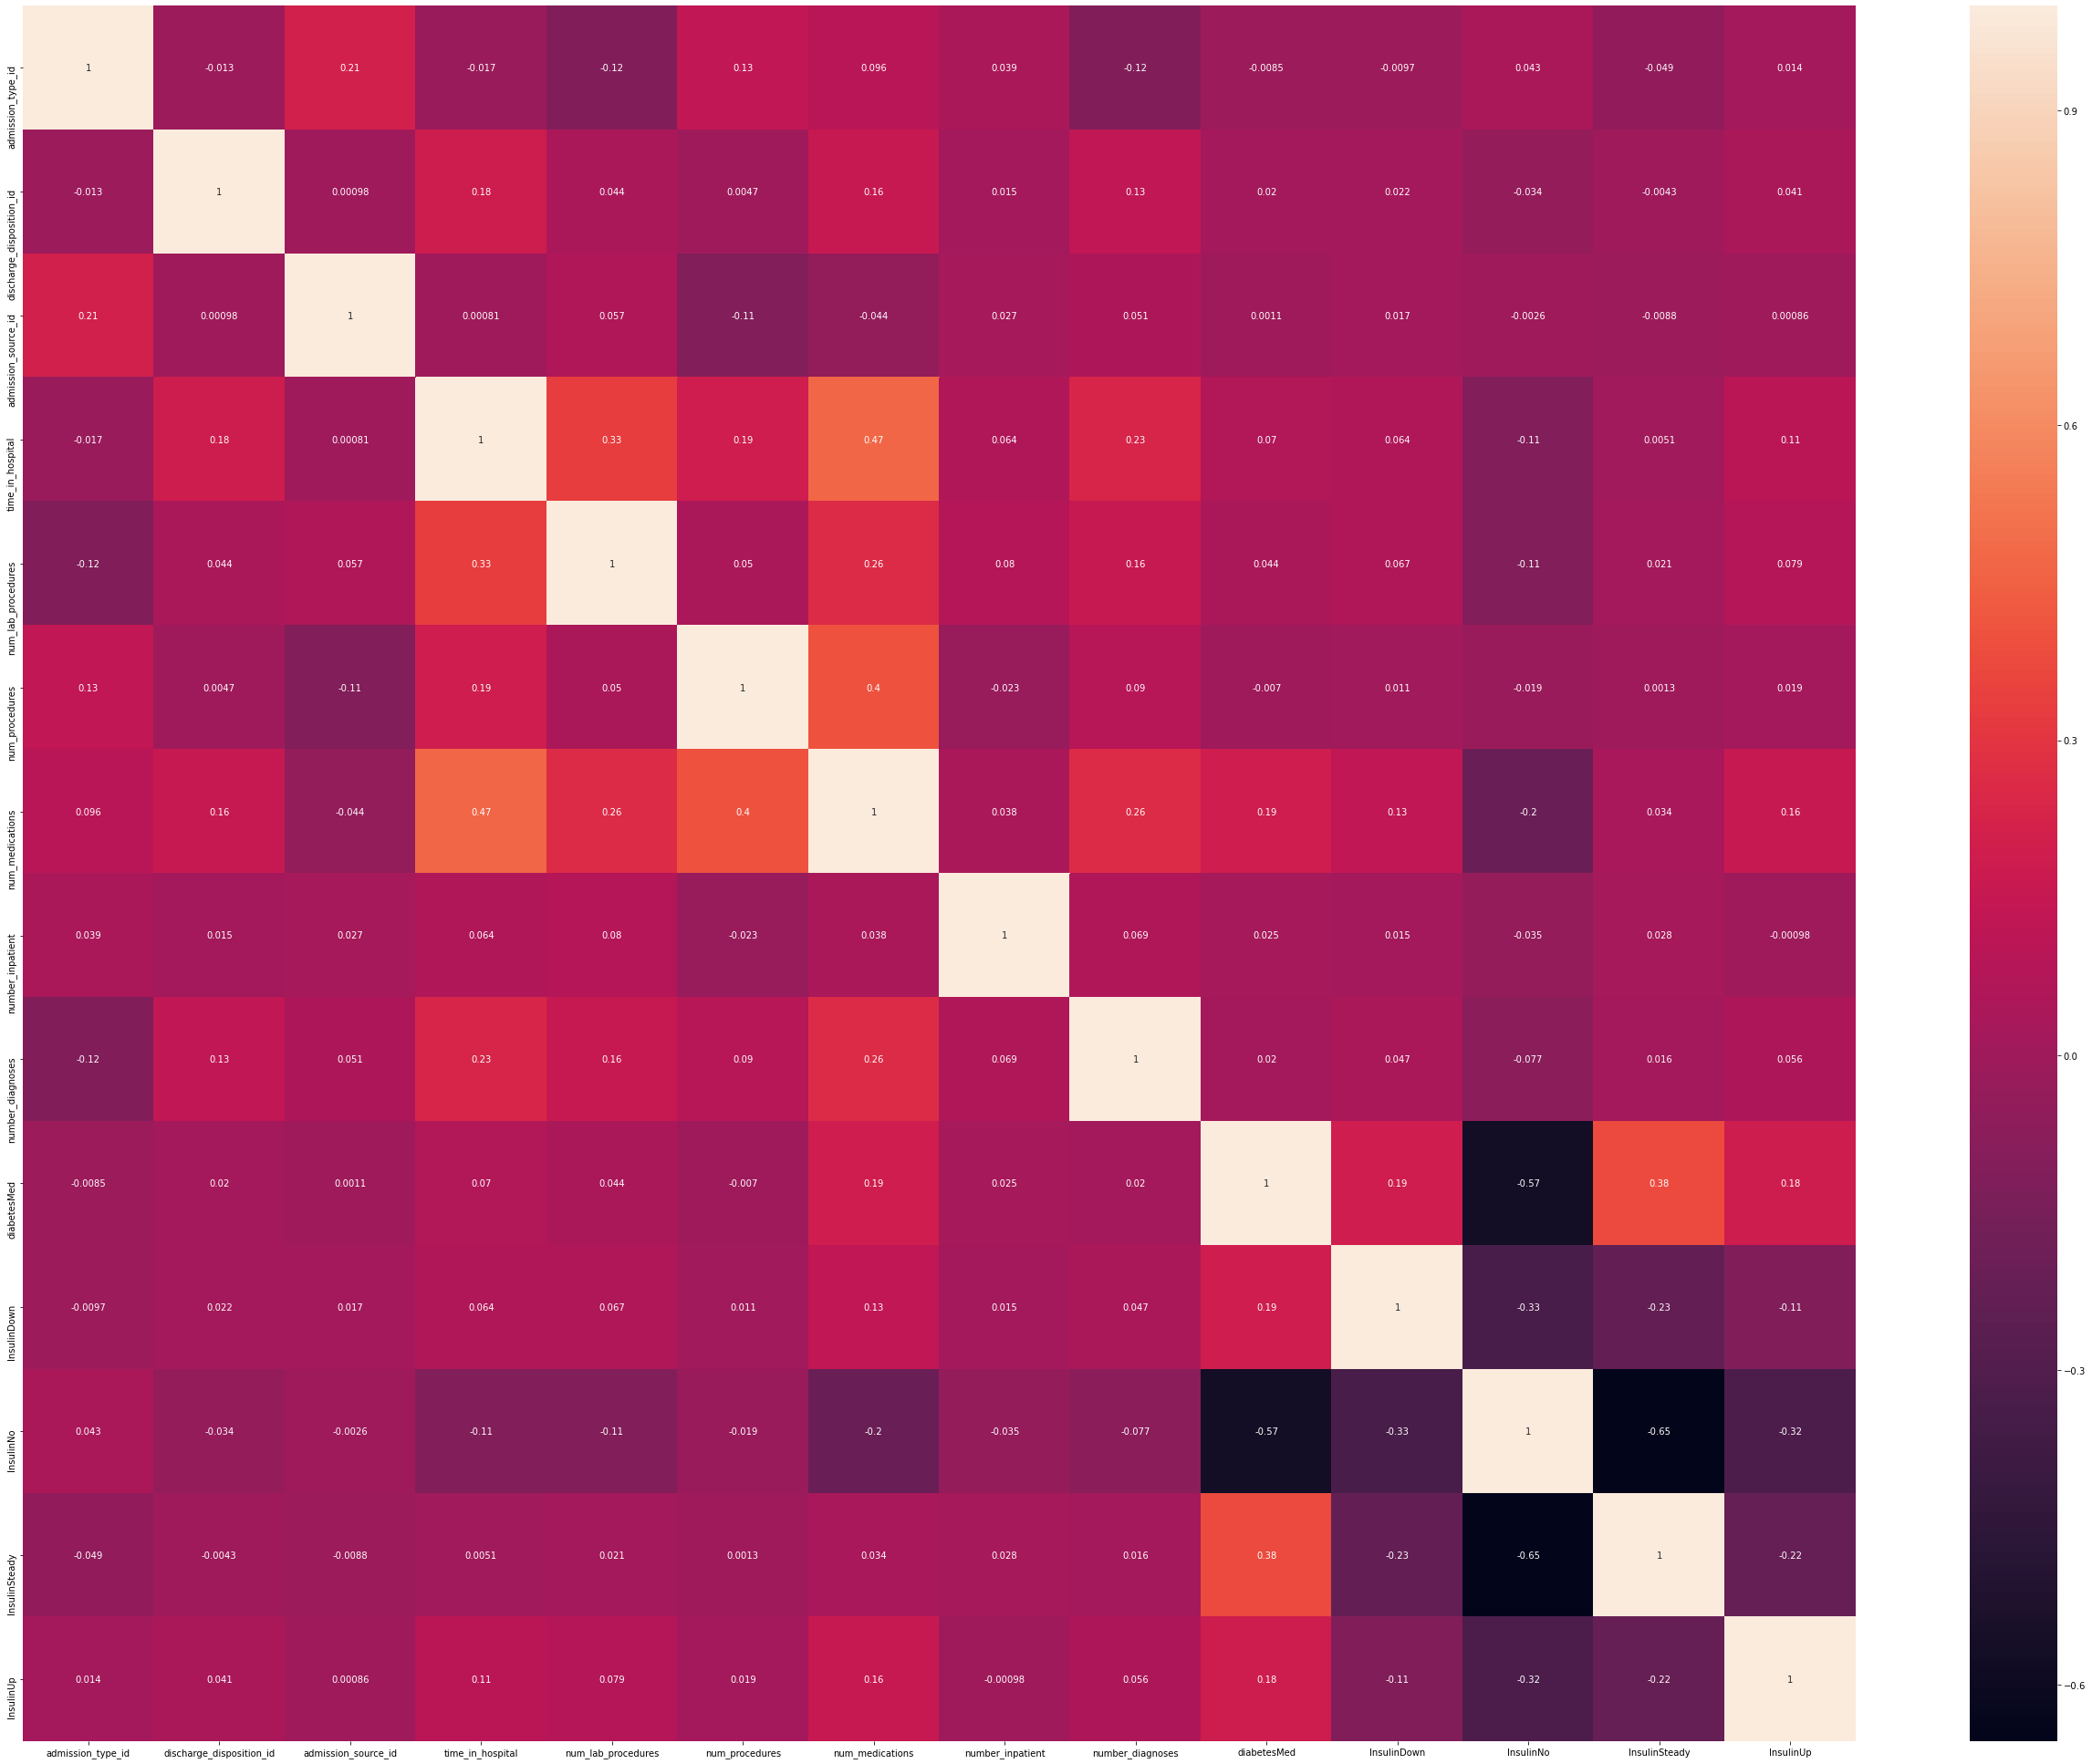

In [34]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(45,35))
sns.heatmap(corr, annot=True, ax=ax)

To print the histo diagram for each descriptive feature with target feature to see the distribution.

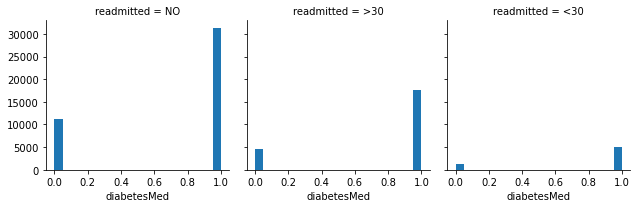

In [35]:
g = sns.FacetGrid(data, col='readmitted')
g.map(plt.hist, 'diabetesMed', bins=20)

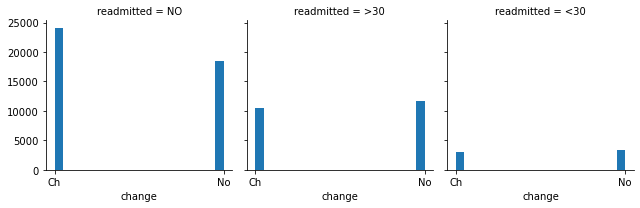

In [36]:
g = sns.FacetGrid(data, col='readmitted')
g.map(plt.hist, 'change', bins=20)

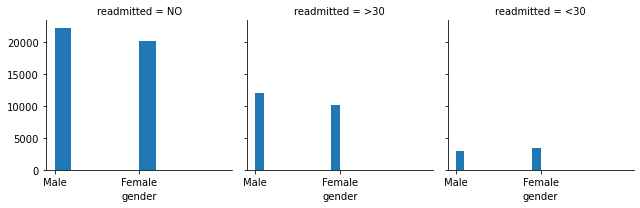

In [37]:
g = sns.FacetGrid(data, col='readmitted')
g.map(plt.hist, 'gender', bins=10)

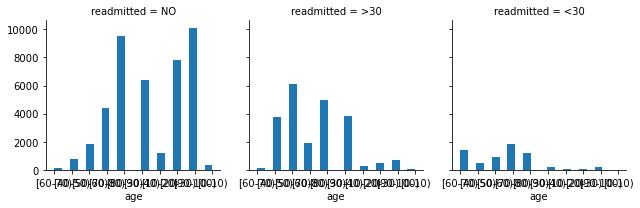

In [38]:
g = sns.FacetGrid(data, col='readmitted')
g.map(plt.hist, 'age', bins=20)

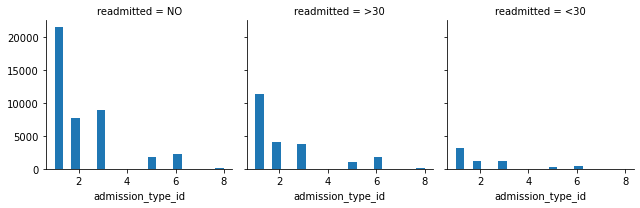

In [39]:
g = sns.FacetGrid(data, col='readmitted')
g.map(plt.hist, 'admission_type_id', bins=20)

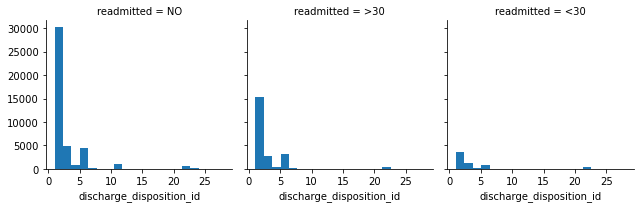

In [40]:
g = sns.FacetGrid(data, col='readmitted')
g.map(plt.hist, 'discharge_disposition_id', bins=20)

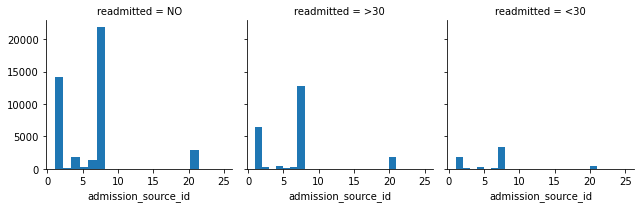

In [41]:
g = sns.FacetGrid(data, col='readmitted')
g.map(plt.hist, 'admission_source_id', bins=20)

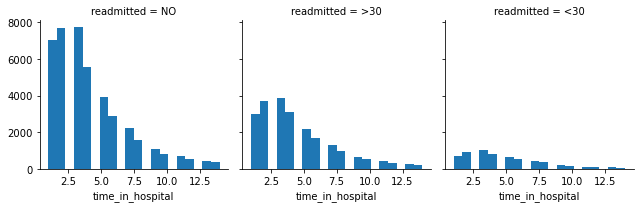

In [42]:
g = sns.FacetGrid(data, col='readmitted')
g.map(plt.hist, 'time_in_hospital', bins=20)

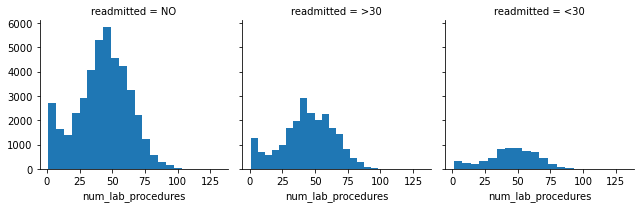

In [43]:
g = sns.FacetGrid(data, col='readmitted')
g.map(plt.hist, 'num_lab_procedures', bins=20)

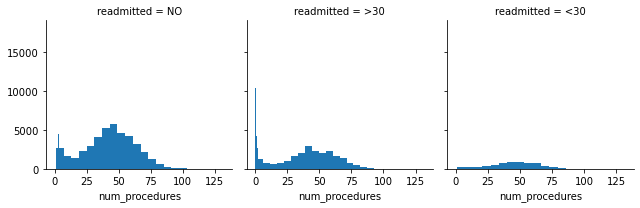

In [44]:
g.map(plt.hist, 'num_procedures', bins=20)

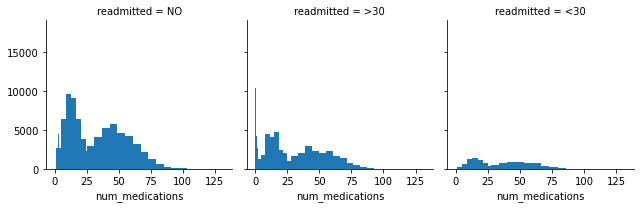

In [45]:
g.map(plt.hist, 'num_medications', bins=20)

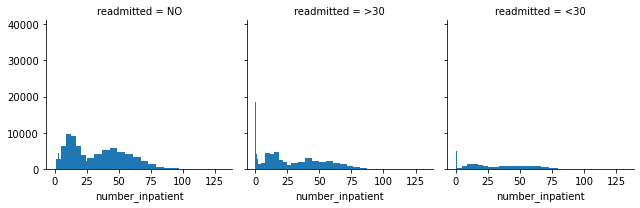

In [46]:
g.map(plt.hist, 'number_inpatient', bins=20)

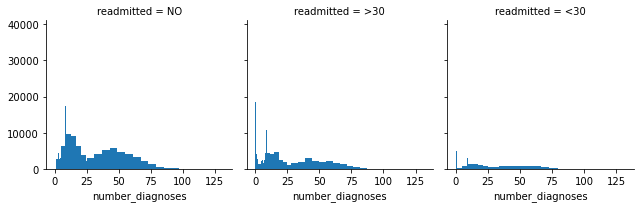

In [47]:
g.map(plt.hist, 'number_diagnoses', bins=20)

By comparing the distribution of each descriptive feature, their distribution can be accepted. There are no features contribute nearly contributing no differences for each type of target feature.

In [48]:
data["race"].value_counts()

Caucasian          53118
AfricanAmerican    12817
Others              1944
Hispanic            1509
Other               1167
Asian                494
Name: race, dtype: int64

In [49]:
data["admission_type_id"].value_counts()

1    36185
3    13863
2    12969
6     4573
5     3138
8      291
7       21
4        9
Name: admission_type_id, dtype: int64

In [50]:
data["admission_source_id"].value_counts()

7     37986
1     21898
21     5161
4      2572
6      1798
2       925
5       542
3       138
8        12
10        7
22        4
25        2
14        2
13        1
11        1
Name: admission_source_id, dtype: int64

In [51]:
data["discharge_disposition_id"].value_counts()

1     47566
3      8782
6      8288
2      1538
22     1410
11     1077
5       913
4       541
7       408
23      260
28       90
8        73
15       40
24       25
9         9
17        8
19        6
10        6
16        3
27        3
12        2
20        1
Name: discharge_disposition_id, dtype: int64

Add the number of procedures together, actually I think it is Ok to add them together to predict the diabetes.

In [52]:
data['procedures'] = data['num_lab_procedures'] + data['num_procedures']

This new feature seems the same as the number_diagnosis, so drop the two procedures. Actually it is ok to treat the diagnose as the same thing to procedures

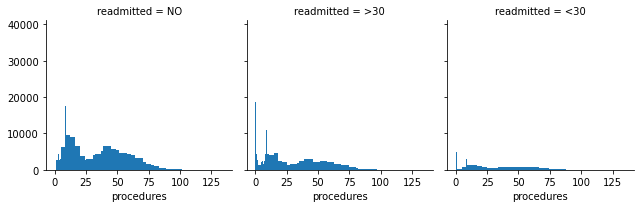

In [53]:
g.map(plt.hist, 'procedures', bins=20)

In [54]:
data.drop(['diag_2'], inplace=True, axis=1)
data.drop(['diag_3'], inplace=True, axis=1)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71049 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71049 non-null  object
 1   gender                    71049 non-null  object
 2   age                       71049 non-null  object
 3   admission_type_id         71049 non-null  int64 
 4   discharge_disposition_id  71049 non-null  int64 
 5   admission_source_id       71049 non-null  int64 
 6   time_in_hospital          71049 non-null  int64 
 7   num_lab_procedures        71049 non-null  int64 
 8   num_procedures            71049 non-null  int64 
 9   num_medications           71049 non-null  int64 
 10  number_inpatient          71049 non-null  int64 
 11  diag_1                    70125 non-null  object
 12  number_diagnoses          71049 non-null  int64 
 13  change                    71049 non-null  object
 14  diabetesMed          

In [56]:
data.drop(['num_lab_procedures'], inplace=True, axis=1)
data.drop(['num_procedures'], inplace=True, axis=1)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71049 entries, 0 to 101765
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71049 non-null  object
 1   gender                    71049 non-null  object
 2   age                       71049 non-null  object
 3   admission_type_id         71049 non-null  int64 
 4   discharge_disposition_id  71049 non-null  int64 
 5   admission_source_id       71049 non-null  int64 
 6   time_in_hospital          71049 non-null  int64 
 7   num_medications           71049 non-null  int64 
 8   number_inpatient          71049 non-null  int64 
 9   diag_1                    70125 non-null  object
 10  number_diagnoses          71049 non-null  int64 
 11  change                    71049 non-null  object
 12  diabetesMed               71049 non-null  int64 
 13  readmitted                71049 non-null  object
 14  InsulinDown          

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71049 entries, 0 to 101765
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71049 non-null  object
 1   gender                    71049 non-null  object
 2   age                       71049 non-null  object
 3   admission_type_id         71049 non-null  int64 
 4   discharge_disposition_id  71049 non-null  int64 
 5   admission_source_id       71049 non-null  int64 
 6   time_in_hospital          71049 non-null  int64 
 7   num_medications           71049 non-null  int64 
 8   number_inpatient          71049 non-null  int64 
 9   diag_1                    71049 non-null  object
 10  number_diagnoses          71049 non-null  int64 
 11  change                    71049 non-null  object
 12  diabetesMed               71049 non-null  int64 
 13  readmitted                71049 non-null  object
 14  InsulinDown          

In [60]:
num_encode = {
    'admission_type_id':{5:6,8:6,7:5}
    
}
data.replace(num_encode, inplace=True)

The next step is the dummy for each categorical feature. Specially, the admission type, source and discharge disposition can be divided into some category instead of one number correspond to one dummy which may cause the number of features to be too big for prediction.

In [61]:
#热编码，三个number的id替换
dummy = pd.get_dummies(data['race'])
data = pd.concat([data, dummy], axis=1)      
data.drop(['race'], inplace=True, axis=1)

In [62]:
num_encode = {
    'admission_type_id':{1:'Emergency',2:'Urgent',3:'Elective',4:'Newborn',6:'Not Available',5:'Trauma Center'},
    'discharge_disposition_id':{1:'home',6:'home',8:'home',3:'organization',5:'organization',15:'organization',30:'organization',24:'organization',
                               2:'hospital',4:'hospital',9:'hospital',10:'hospital',16:'hospital',17:'hospital',22:'hospital',28:'hospital',27:'hospital',23:'hospital',
                               29:'emergency',18:'not available',25:'not available',26:'not available',12:'expired',11:'expired',7:'expired',19:'hotspice',20:'hotspice',21:'hotspice'},
    'admission_source_id':{11:'normal infant',23:'normal infant',24:'normal infant',2:'organization',3:'organization',18:'organization',19:'organization',26:'organization',
                           5:'organization',6:'organization',1:'hospital',4:'hospital',22:'hospital',
                           7:'emergency',8:'emergency',10:'emergency',25:'emergency',
                           12:'abnormal infant',13:'abnormal infant',14:'abnormal infant',
                           9:'not available',17:'not available',15:'not available',20:'not available',21:'not available'}
}    

data.replace(num_encode, inplace=True)

In [63]:
data["admission_type_id"] = data["admission_type_id"].replace('Emergency','AdmissionEmergency')
data["admission_type_id"] = data["admission_type_id"].replace('Urgent','AdmissionUrgent')
data["admission_type_id"] = data["admission_type_id"].replace('Elective','AdmissionElective')
data["admission_type_id"] = data["admission_type_id"].replace('Newborn','AdmissionNewborn')
data["admission_type_id"] = data["admission_type_id"].replace('Trauma Center','AdmissionTraumaCenter')
data["admission_type_id"] = data["admission_type_id"].replace('Not Available','AdmissionNotAvailable')

In [64]:
dummy = pd.get_dummies(data['admission_type_id'])
data = pd.concat([data, dummy], axis=1)      
data.drop(['admission_type_id'], inplace=True, axis=1)
data.drop(['AdmissionNotAvailable'], inplace=True, axis=1)

In [65]:
data["discharge_disposition_id"] = data["discharge_disposition_id"].replace('home','DischargeHome')
data["discharge_disposition_id"] = data["discharge_disposition_id"].replace('organization','Dischargeorganization')
data["discharge_disposition_id"] = data["discharge_disposition_id"].replace('hospital','DischargeHospital')
data["discharge_disposition_id"] = data["discharge_disposition_id"].replace('expired','DischargeExpired')
data["discharge_disposition_id"] = data["discharge_disposition_id"].replace('emergency','DischargeEmergency')
data["discharge_disposition_id"] = data["discharge_disposition_id"].replace('not available','DischargeNotAvailable')
data["discharge_disposition_id"] = data["discharge_disposition_id"].replace('hotspice','DischargeHotspice')

In [66]:
dummy = pd.get_dummies(data['discharge_disposition_id'])
data = pd.concat([data, dummy], axis=1)      
data.drop(['discharge_disposition_id'], inplace=True, axis=1)
data.drop(['DischargeHotspice'], inplace=True, axis=1)
# data.drop(['DischargeNotAvailable'], inplace=True, axis=1)

In [67]:
data["admission_source_id"] = data["admission_source_id"].replace('normal infant','AdmissionNormalIinfant')
data["admission_source_id"] = data["admission_source_id"].replace('organization','AdmissionOrganization')
data["admission_source_id"] = data["admission_source_id"].replace('hospital','AdmissionHospital')
data["admission_source_id"] = data["admission_source_id"].replace('emergency','AdmissionEmergency')
data["admission_source_id"] = data["admission_source_id"].replace('abnormal infant','AdmissionAbnormalInfant')
data["admission_source_id"] = data["admission_source_id"].replace('not available','AdmissionNotAvailable')

In [68]:
dummy = pd.get_dummies(data['admission_source_id'])
data = pd.concat([data, dummy], axis=1)      
data.drop(['admission_source_id'], inplace=True, axis=1)
data.drop(['AdmissionNotAvailable'], inplace=True, axis=1)

In [79]:
data['diag_1'].value_counts()

0.0    21782
8.0    11373
1.0     9697
2.0     6545
3.0     5787
4.0     4769
5.0     4073
6.0     3477
7.0     2622
Name: diag_1, dtype: int64

In [80]:
num_encode = {
    'diag_1':{0:'Circulatory', 1:'Respiratory', 2:'Digestive', 3:'Diabetes', 4:'Injury', 5:'Musculoskeletal', 6:'Genitourinary', 7:'Neoplasms', 8:'Other'}
}    

data.replace(num_encode, inplace=True)

In [81]:
dummy = pd.get_dummies(data['diag_1'])
data = pd.concat([data, dummy], axis=1)      
data.drop(['diag_1'], inplace=True, axis=1)

In [70]:
num_encode = {
    'gender':{'Female':0,'Male':1},
    'age':{'[0-10)':0,'[10-20)':1,'[20-30)':2,'[30-40)':3,'[40-50)':4,'[50-60)':5,'[60-70)':6,'[70-80)':7,'[80-90)':8,'[90-100)':9},
    'change':{'No':0,'Ch':1},
    'readmitted':{'NO':0,'<30':1,'>30':2}
}    

data.replace(num_encode, inplace=True)

To print the data after data cleaning into a csv file to use later.

In [1]:
data.to_csv("./output.csv")

NameError: name 'data' is not defined